###Importing the necessary libraries

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Importing the essential libraries for NLP

In [237]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

###Importing the dataset

In [238]:
dataset = pd.read_csv('emotion.csv')
dataset.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [239]:
dataset.shape

(2000, 2)

In [240]:
dataset.info

<bound method DataFrame.info of                                                    text  label
0     im feeling rather rotten so im not very ambiti...      0
1             im updating my blog because i feel shitty      0
2     i never make her separate from me because i do...      0
3     i left with my bouquet of red and yellow tulip...      1
4       i was feeling a little vain when i did this one      0
...                                                 ...    ...
1995  i just keep feeling like someone is being unki...      3
1996  im feeling a little cranky negative after this...      3
1997  i feel that i am useful to my people and that ...      1
1998  im feeling more comfortable with derby i feel ...      1
1999  i feel all weird when i have to meet w people ...      4

[2000 rows x 2 columns]>

###Downloading stopwords

In [241]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [242]:
stopwords = stopwords.words('english')
print(stopwords)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

###Features and targert

In [243]:
x = dataset['text']
x.head()

,text
0,im feeling rather rotten so im not very ambiti...
1,im updating my blog because i feel shitty
2,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this one


In [244]:
y = dataset['label']
y.head()

,label
0,0
1,0
2,0
3,1
4,0


###Checking missing values

In [245]:
print(pd.isnull(dataset).sum())

text     0
label    0
dtype: int64


###Checking the balance of dataset

In [246]:
count = dataset['label'].value_counts()
print(count)

label
1    695
0    581
3    275
4    224
2    159
5     66
Name: count, dtype: int64


In [247]:
ratio = count.max()/count.min()
if ratio <= 1.5:
  print('The dataset is balanced')
elif ratio <=3:
  print('The dataset is somewhat imbalanced optional balancing required')
else:
  print('The dataset is extremely imbalanced')

The dataset is extremely imbalanced


<Axes: xlabel='count', ylabel='label'>

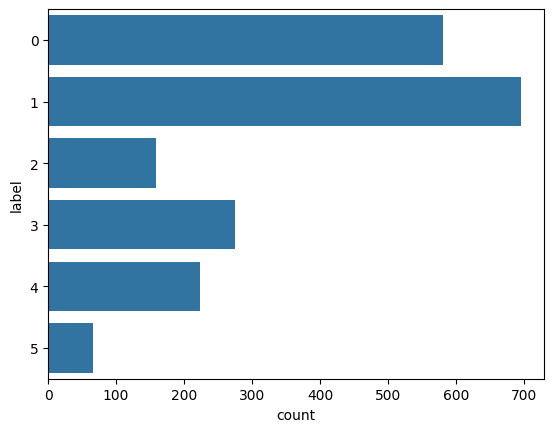

In [248]:
sns.countplot(y='label', data=dataset)

###Balancing the dataset

In [249]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
balanced_dataset = ros.fit_resample(x.to_frame(),y)

<Axes: xlabel='count', ylabel='label'>

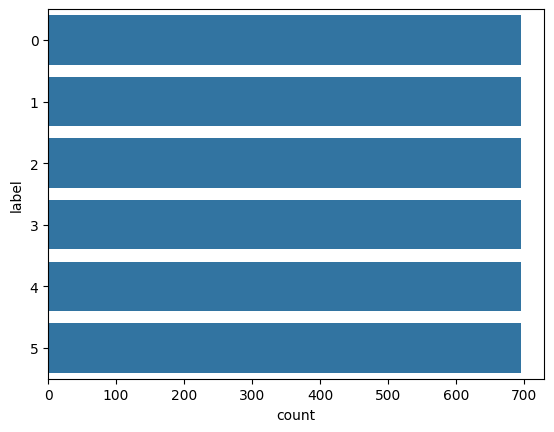

In [250]:
sns.countplot(y=balanced_dataset[1])

In [251]:
balanced_dataset

(                                                   text
 0     im feeling rather rotten so im not very ambiti...
 1             im updating my blog because i feel shitty
 2     i never make her separate from me because i do...
 3     i left with my bouquet of red and yellow tulip...
 4       i was feeling a little vain when i did this one
 ...                                                 ...
 4165  i feel a little stunned but can t imagine what...
 4166  i didn t think it was possible to make a cover...
 4167           i found myself feeling a bit overwhelmed
 4168           i found myself feeling a bit overwhelmed
 4169  i feel curious because i would like to explore...
 
 [4170 rows x 1 columns],
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 4165    5
 4166    5
 4167    5
 4168    5
 4169    5
 Name: label, Length: 4170, dtype: int64)

In [252]:
count = balanced_dataset[1].value_counts()
print(count)

label
0    695
1    695
4    695
3    695
2    695
5    695
Name: count, dtype: int64


###Extracting features from oversampled dataset

In [253]:
X = balanced_dataset[0]
X

,text
0,im feeling rather rotten so im not very ambiti...
1,im updating my blog because i feel shitty
2,i never make her separate from me because i do...
3,i left with my bouquet of red and yellow tulip...
4,i was feeling a little vain when i did this one
...,...
4165,i feel a little stunned but can t imagine what...
4166,i didn t think it was possible to make a cover...
4167,i found myself feeling a bit overwhelmed
4168,i found myself feeling a bit overwhelmed


In [254]:
Y = balanced_dataset[1]
Y

,label
0,0
1,0
2,0
3,1
4,0
...,...
4165,5
4166,5
4167,5
4168,5


###Stemming

In [255]:
stem = PorterStemmer()

In [256]:
def stemming(text):
  stemmed_text = re.sub('^[a-zA-z]', ' ', text)
  stemmed_text = stemmed_text.lower()
  stemmed_text = stemmed_text.split()
  stemmed_text = [stem.stem(word) for word in stemmed_text if not word in stopwords]
  stemmed_text = ' '.join(stemmed_text)
  return stemmed_text

In [257]:
X['text'] = X['text'].apply(stemming)
X.head()

,text
0,feel rather rotten im ambiti right
1,updat blog feel shitti
2,never make separ ever want feel like asham
3,left bouquet red yellow tulip arm feel slightl...
4,feel littl vain one


###Turning features and target into np array

In [258]:
X = X.values.flatten()

In [259]:
Y

,label
0,0
1,0
2,0
3,1
4,0
...,...
4165,5
4166,5
4167,5
4168,5


###Converting textual data into feature vectors

In [260]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

###Splitting data into train and test

In [261]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

###Model training

In [262]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=42)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

###Prediction

In [263]:
y_pred = classifier.predict(X_test)

In [264]:
y_pred

array([0, 4, 0, 4, 5, 1, 4, 3, 5, 1, 0, 4, 2, 1, 2, 2, 0, 5, 5, 0, 0, 4,
       5, 3, 2, 1, 3, 1, 4, 4, 4, 3, 3, 4, 2, 1, 1, 3, 0, 4, 0, 4, 2, 1,
       3, 5, 4, 1, 3, 4, 2, 5, 1, 0, 4, 2, 1, 0, 2, 2, 3, 5, 2, 1, 1, 5,
       0, 3, 5, 0, 5, 0, 1, 2, 0, 3, 4, 4, 2, 2, 4, 0, 4, 0, 4, 2, 1, 1,
       3, 1, 3, 4, 0, 5, 3, 2, 5, 2, 3, 1, 3, 2, 2, 3, 5, 0, 0, 5, 1, 1,
       3, 2, 2, 2, 1, 3, 1, 4, 3, 0, 5, 3, 0, 4, 2, 5, 2, 4, 1, 1, 1, 0,
       4, 3, 1, 3, 3, 5, 1, 4, 0, 5, 2, 2, 1, 4, 1, 4, 0, 1, 2, 5, 4, 1,
       1, 2, 4, 5, 0, 2, 3, 1, 4, 2, 2, 0, 1, 2, 3, 4, 3, 0, 3, 2, 3, 3,
       3, 2, 2, 4, 5, 5, 0, 5, 3, 0, 5, 1, 3, 5, 2, 0, 4, 3, 3, 2, 5, 2,
       3, 2, 5, 4, 4, 4, 5, 0, 1, 4, 0, 2, 3, 0, 0, 4, 2, 5, 2, 2, 3, 0,
       1, 3, 4, 5, 2, 4, 0, 3, 3, 3, 2, 0, 0, 3, 3, 2, 4, 3, 1, 4, 1, 1,
       5, 3, 1, 1, 5, 2, 1, 3, 4, 1, 3, 4, 5, 2, 0, 3, 3, 5, 1, 1, 1, 0,
       2, 0, 2, 0, 1, 5, 0, 4, 0, 5, 2, 2, 3, 5, 5, 2, 5, 0, 5, 3, 3, 4,
       3, 5, 2, 5, 2, 5, 1, 5, 1, 0, 5, 1, 1, 1, 3,

###Checking overfit and underfit

In [265]:
from sklearn.metrics import accuracy_score

# Training prediction
y_train_pred = classifier.predict(X_train)
train_acc = accuracy_score(Y_train, y_train_pred)

# Validation prediction
y_val_pred = classifier.predict(X_test)
val_acc = accuracy_score(Y_test, y_val_pred)

print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

if train_acc - val_acc > 0.08:
    print("⚠️ Model is OVERFITTING")
elif train_acc < 0.70 and val_acc < 0.70:
    print("⚠️ Model is UNDERFITTING")
else:
    print("✅ Model fits well (NO major overfitting/underfitting).")

Training Accuracy: 0.99310551558753
Validation Accuracy: 0.9280575539568345
✅ Model fits well (NO major overfitting/underfitting).


###Confusion matrix

<Axes: >

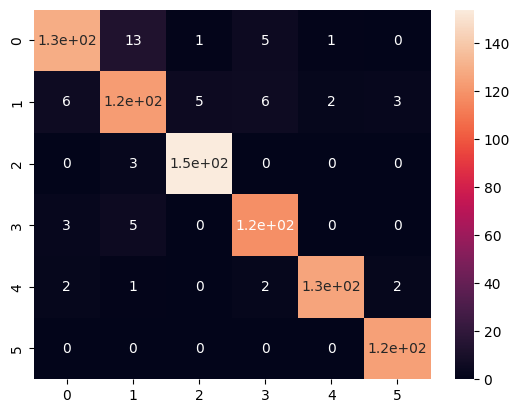

In [266]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True)

###Classification report

In [267]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       149
           1       0.85      0.85      0.85       145
           2       0.96      0.98      0.97       157
           3       0.90      0.94      0.92       126
           4       0.98      0.95      0.96       133
           5       0.96      1.00      0.98       124

    accuracy                           0.93       834
   macro avg       0.93      0.93      0.93       834
weighted avg       0.93      0.93      0.93       834



###K-fold cross validation

In [268]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print(accuracies)

[0.9011976  0.91916168 0.91616766 0.92215569 0.90419162 0.93413174
 0.9009009  0.92792793 0.9039039  0.90690691]


###Accuracy of model

In [269]:
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(Y_test, y_pred) *100, 2)
print(f"Accuracy of the model is {accuracy}%")

Accuracy of the model is 92.81%


###Text Emotion Classification

In [276]:
input_text = ['im feeling rather rotten so im not very ambitious right now']
input_data = stemming(input_text[0])
input_text = vectorizer.transform([input_data])
prediction = classifier.predict(input_text)
if prediction[0] == 0:
  print(prediction)
  print("The emotion is sadness")
elif prediction[0] == 1:
  print(prediction)
  print("The emotion is joy")
elif prediction[0] == 2:
  print(prediction)
  print("The emotion is love")
elif prediction[0] == 3:
  print(prediction)
  print("The emotion is anger")
else:
  print(prediction)
  print("The emotion is fear")

[0]
The emotion is sadness
